In [1]:
import os
from IPython.utils import io
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Question 1  
(-1/5, 1.0). emperically calcualated

Question 2

In [26]:
# Load data
path1 = './data/finance_data/Name_sector.csv'
path2 = './data/finance_data/data/'
n_rows = 765 # many files in finance_data/data have 765 rows (+1 for header), we only use these ones
n_files = len(os.listdir(path2))

stock_prices = []
stock_names = []
stock_sectors = []
with open(path1, 'r') as name_sector_f:
    line = name_sector_f.readline()
    for f in os.listdir(path2):
        if len(f) > 3 and f[-3:] == 'csv': # skip DS_Store file
            line = name_sector_f.readline()
            n_lines = sum(1 for _ in open(path2 + f))
            if n_lines == n_rows + 1: # +1 for header
                name, sector = line.strip().split(',') # strip() removes \n
                stock_names.append(name)
                stock_sectors.append(sector)
                stock_prices.append(np.genfromtxt(path2 + f, delimiter=',', skip_header=1, usecols=4, dtype=np.float64))

stock_prices = np.array(stock_prices)

Text(0, 0.5, 'Frequency')

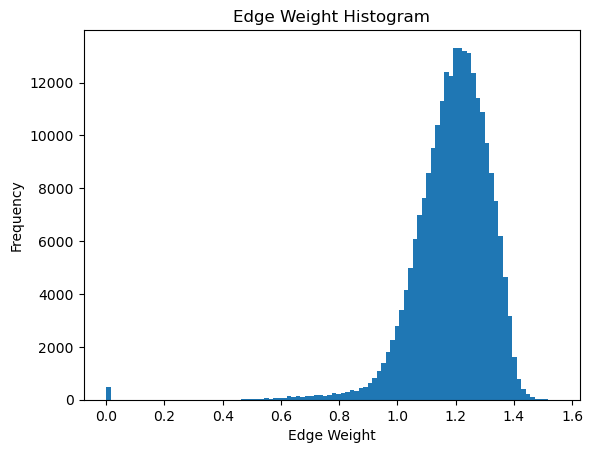

In [27]:
# Calculate values from Question 1
qi_t = (stock_prices[:, 1:] - stock_prices[:, :-1]) / stock_prices[:, :-1]
ri_t = np.log(1 + qi_t)
corr = np.corrcoef(ri_t)
assert len(corr) == len(stock_prices)

# Create graph and plot edge weight histogram
edges = np.sqrt(2 * (1 - corr))
# edges[np.abs(edges) < 1e-3] = 0
G = nx.from_numpy_matrix(edges)
for i in range(len(stock_sectors)):
    G.nodes[i]['sector'] = stock_sectors[i]
    G.nodes[i]['name'] = stock_names[i]
_ = plt.hist(edges.flatten(), bins=100)
plt.title('Edge Weight Histogram')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')

Question 3

The MST shows a few cor sectors that all sectors are related to (financials, industrials, and to a limited extent consumer discretionary). Other sectors such as utilities or energy are very independent of other sectors. The pattern makes sense since sectors like energy and real estate being linked make natural sense. Moreover financials track much of the economy and make sense to be linked with many sectors

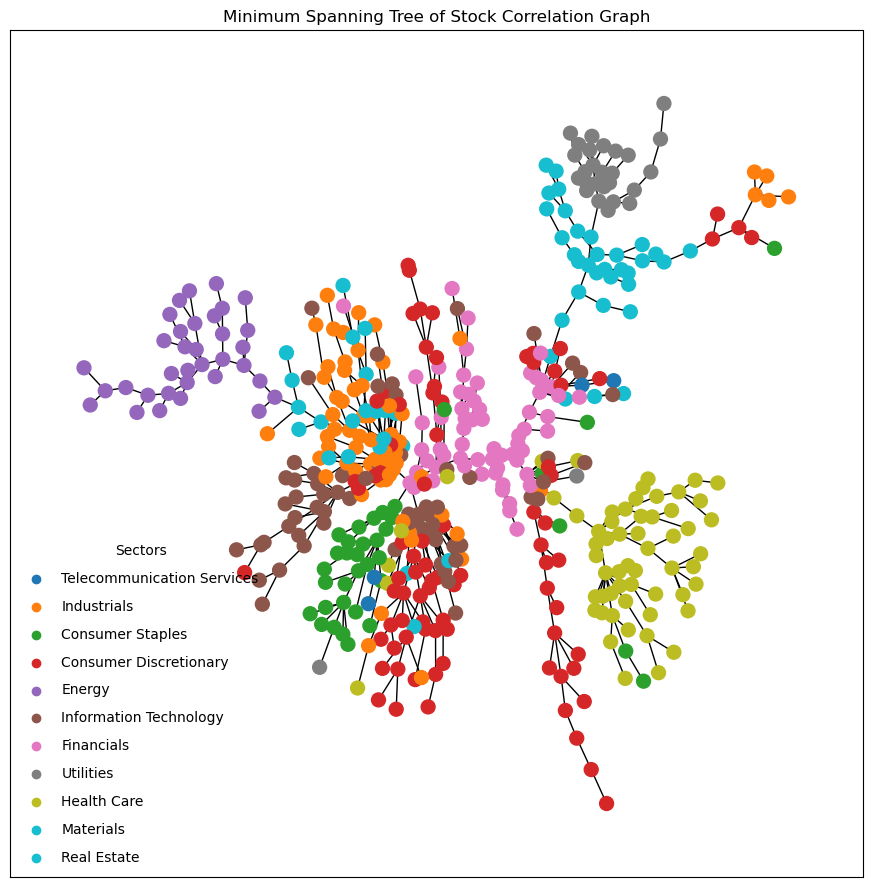

In [77]:
mst = nx.minimum_spanning_tree(G)

# Find and color sector nodes
sectors = tuple(set(stock_sectors))
sector_colors = {}
for i in range(len(sectors)):
    sector_colors[sectors[i]] = i
node_colors = [sector_colors[G.nodes[i]['sector']] for i in range(len(G.nodes))]

# Plot
plt.figure(figsize=(11, 11))
pos = nx.kamada_kawai_layout(mst)
cmap = plt.cm.tab10 # plt.cm.viridis
nx.draw_networkx_nodes(mst, pos, node_size=100, node_color=node_colors, cmap=cmap)
nx.draw_networkx_edges(mst, pos, width=1)
colors = cmap(np.linspace(0, 1, len(sectors)))
with io.capture_output() as captured:
    for i in range(len(sectors)):
        plt.scatter([], [], c=colors[i], label=sectors[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Sectors')
plt.title('Minimum Spanning Tree of Stock Correlation Graph')
plt.show()

QUESTION 4: Run a community detection algorithm (for example walktrap) on the MST ob-
tained above. Plot the communities formed. Compute the homogeneity and completeness of the
clustering. (you can use the ’clevr’ library in r to compute homogeneity and completeness).